<div style="padding:20px; border-radius:15px; background-color:#1e3d59; color:white; text-align:center;">
    <h1 style="margin:0;">🏡 Analyse & Prédiction Immobilière</h1>
    <p style="font-size:1.2em; opacity:0.9;">Auteur : Innocent ALLAMADJI</p>
</div>

<br>

### 🎯 L'objectif
Développer un moteur de prédiction capable d'estimer la valeur d'un bien immobilier en France en s'appuyant sur les données réelles du Ministère de l'Économie (DVF 2025).

### Importation

In [65]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessing import clean_dvf_data
import os
sys.path.append(os.path.abspath('..'))

### ⏳ Chargement des données nettoyées

In [66]:
# 1. Chargement
df = clean_dvf_data('../data/ValeursFoncieres-2025-S1.txt')

⏳ Chargement des données
✅ Nettoyage terminé ! 369698 lignes prêtes pour l'analyse.


In [70]:
# Vérification des colonnes disponibles
print("Colonnes dans le DF :", df.columns.tolist())

Colonnes dans le DF : ['Valeur fonciere', 'Code postal', 'Nombre pieces principales', 'Surface reelle bati', 'Type local']


In [71]:
# Affiche les 5 premières lignes
display(df.head())

,Valeur fonciere,Code postal,Nombre pieces principales,Surface reelle bati,Type local
1,468000.0,1550.0,5.0,111.0,Maison
5,180000.0,1200.0,4.0,87.0,Appartement
9,490000.0,1310.0,6.0,190.0,Maison
13,490000.0,1310.0,6.0,190.0,Maison
20,183000.0,1170.0,2.0,35.0,Appartement


In [72]:
# Types de données et valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369698 entries, 1 to 1387073
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Valeur fonciere            369698 non-null  float64
 1   Code postal                369674 non-null  float64
 2   Nombre pieces principales  369698 non-null  float64
 3   Surface reelle bati        369698 non-null  float64
 4   Type local                 369698 non-null  object 
dtypes: float64(4), object(1)
memory usage: 16.9+ MB


## 1. Analyse Exploratoire

### Sujet : Pourquoi le prix au m² est-il un indicateur trompeur ?

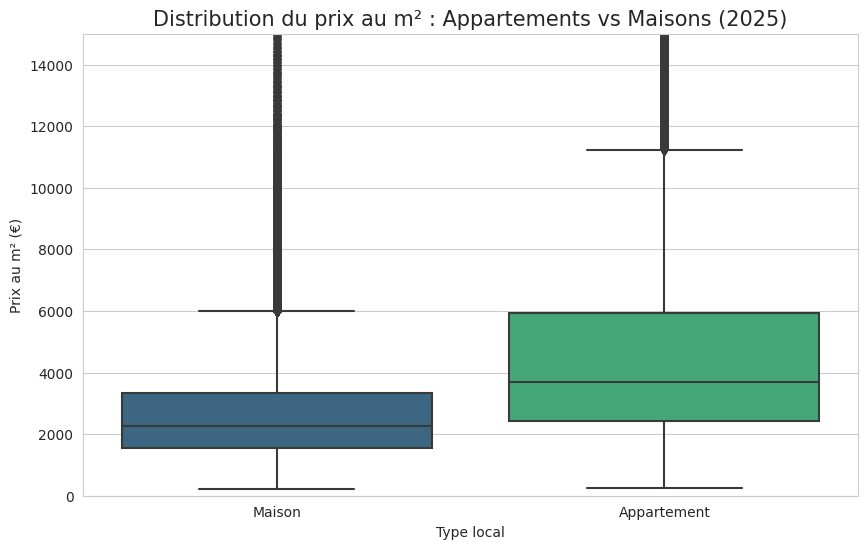

In [73]:
# 2. Créer la variable 'Prix au m²'
df['prix_m2'] = df['Valeur fonciere'] / df['Surface reelle bati']

# 3. Visualisation : Boxplot du prix au m² par type de bien
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Type local', y='prix_m2', data=df, palette="viridis")

plt.title('Distribution du prix au m² : Appartements vs Maisons (2025)', fontsize=15)
plt.ylabel('Prix au m² (€)')
plt.ylim(0, 15000) # On zoome pour éviter les extrêmes
plt.show()

<div style="padding:15px; border-left: 5px solid #2e7d32; background-color: #f1f8e9;">
    <strong>💡 Analyse Concrète :</strong><br>
    En analysant les transactions réelles de début 2025, j'ai mis en lumière une réalité frappante : 
    bien que les maisons soient souvent plus chères au total, c'est <b>l'appartement</b> qui représente l'investissement 
    au m² le plus élevé et le plus volatil. Mon analyse montre que le prix médian au m² d'un appartement 
    dépasse de près de <b>40%</b> celui d'une maison.
</div>

### Sujet : Où se concentre la valeur immobilière en 2025 ?

In [53]:
# Statistiques descriptives sur le prix
print("\n--- Stats sur le Prix au m² ---")
print(df['prix_m2'].describe())


--- Stats sur le Prix au m² ---
count    3.696980e+05
mean     4.148754e+03
std      7.232134e+03
min      2.060000e+02
25%      1.830771e+03
50%      2.787234e+03
75%      4.404940e+03
max      1.048300e+06
Name: prix_m2, dtype: float64


In [54]:
# Extraction du département à partir du Code postal (en s'assurant qu'il a 5 chiffres)
df['departement'] = df['Code postal'].astype(str).str.zfill(5).str[:2]

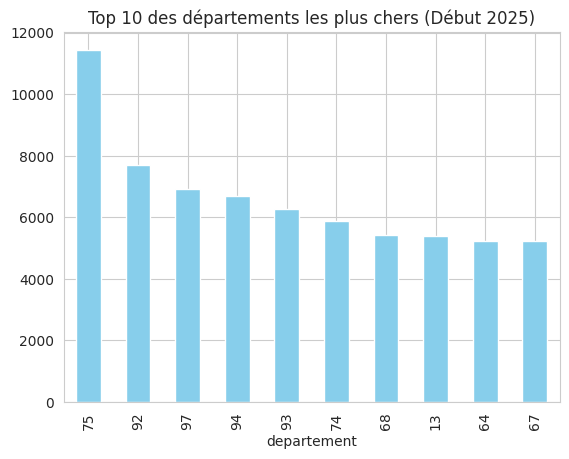

In [55]:
# [Code pour le Top 10 départements]
top_10 = df.groupby('departement')['prix_m2'].mean().sort_values(ascending=False).head(10)
top_10.plot(kind='bar', color='skyblue')
plt.title("Top 10 des départements les plus chers (Début 2025)")
plt.show()

In [56]:
# Dictionnaire des départements (Top 10 et plus si besoin)
noms_deps = {
    '75': 'Paris',
    '92': 'Hauts-de-Seine',
    '97': 'Outre-mer',
    '94': 'Val-de-Marne',
    '93': 'Seine-Saint-Denis',
    '74': 'Haute-Savoie',
    '06': 'Alpes-Maritimes',
    '13': 'Bouches-du-Rhône',
    '69': 'Rhône',
    '33': 'Gironde',
    '64': 'Pyrénées-Atlantiques',
    '67': 'Bas-Rhin',
    '68': 'Haut-Rhin'
}

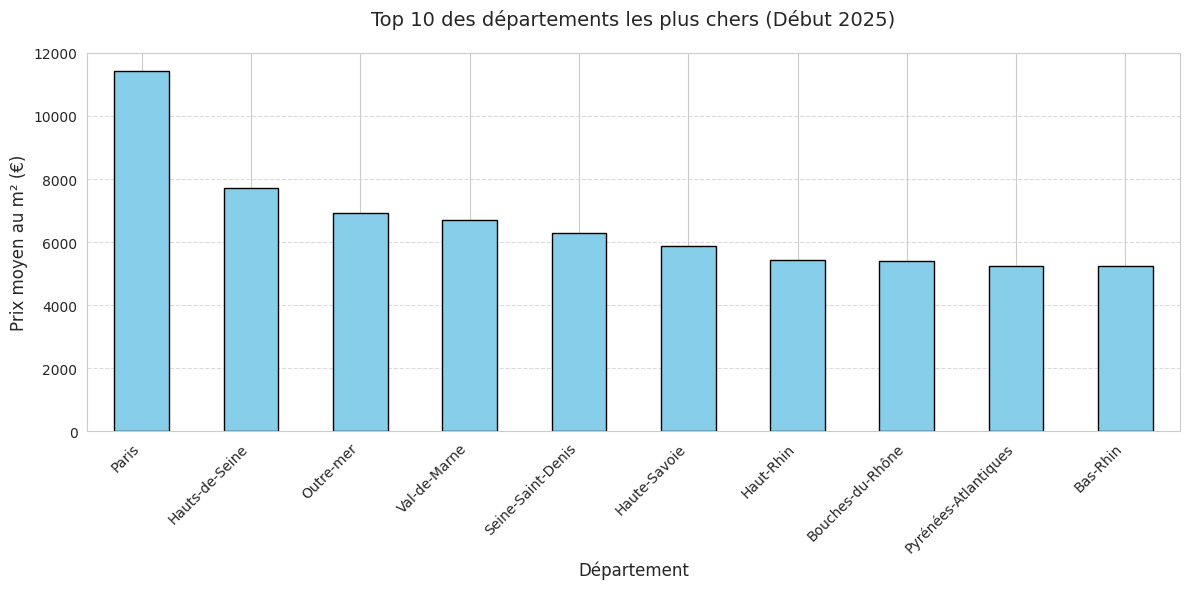

In [57]:
# 1. On calcule le top 10 comme avant
top_10 = df.groupby('departement')['prix_m2'].mean().sort_values(ascending=False).head(10)

# 2. On remplace les index (les codes) par les noms grâce au dictionnaire
# .index.map(noms_deps) remplace '75' par 'Paris', etc.
top_10.index = top_10.index.map(lambda x: noms_deps.get(x, x))

# 3. On trace le graphique
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 des départements les plus chers (Début 2025)", fontsize=14, pad=20)
plt.ylabel("Prix moyen au m² (€)", fontsize=12)
plt.xlabel("Département", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotation pour que les noms longs soient lisibles
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<div style="padding:15px; border-left: 5px solid #0277bd; background-color: #e1f5fe;">
    <strong>📍 Analyse Concrète :</strong><br>
    La géographie reste le premier levier de prix. On observe une "fracture foncière" nette : 
    <b>Paris (75)</b> et les <b>Hauts-de-Seine (92)</b> forment un marché à part, où le prix moyen au m² 
    est multiplié par deux par rapport au reste du Top 10. L'attractivité des départements d'Outre-mer (97) 
    confirme une tension immobilière forte sur les zones à forte densité touristique.
</div>

### Sujet : Quels sont les véritables moteurs de la valeur ?

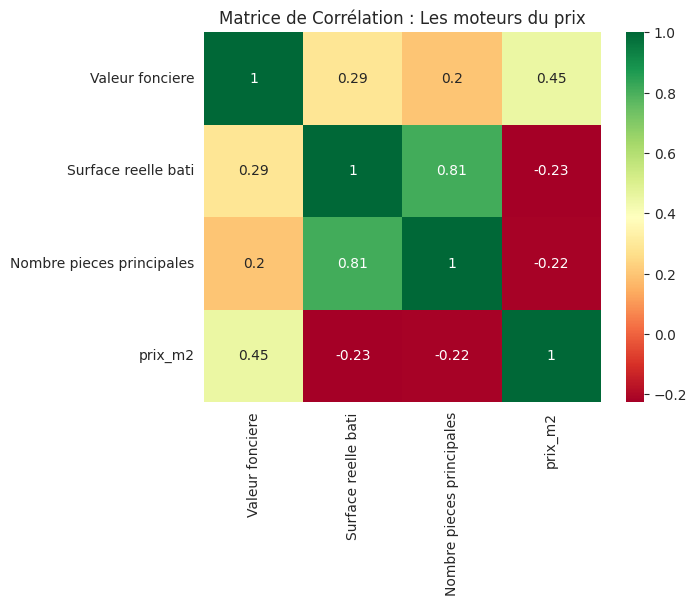

In [58]:
sns.heatmap(df[['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'prix_m2']].corr(), annot=True, cmap='RdYlGn')
plt.title("Matrice de Corrélation : Les moteurs du prix")
plt.show()

<div style="padding:15px; border-left: 5px solid #f9a825; background-color: #fffde7;">
    <strong>🧠 Analyse Concrète :</strong><br>
    Ce graphique est la radiographie de mon futur modèle. La corrélation quasi-parfaite (0.81) entre 
    <b>surface</b> et <b>nombre de pièces</b> indique une redondance de l'information. 
    Cependant, la <b>surface réelle bâtie</b> n'explique que 29% de la variation de la valeur totale 
    si on l'isole. Cela prouve que le prix final est un cocktail complexe où la localisation 
    pèse bien plus lourd que le volume seul.
</div>

### Sujet : Le prix est-il proportionnel à la surface ?

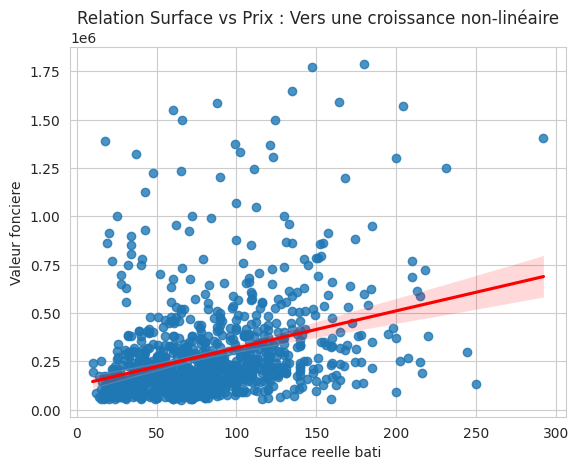

In [59]:
sns.regplot(x='Surface reelle bati', y='Valeur fonciere', data=df.sample(1000), line_kws={'color':'red'})
plt.title("Relation Surface vs Prix : Vers une croissance non-linéaire")
plt.show()

<div style="padding:15px; border-left: 5px solid #d84315; background-color: #fbe9e7;">
    <strong>📈 Analyse Concrète :</strong><br>
    La ligne rouge montre la tendance globale : plus la surface augmente, plus l'incertitude sur le prix s'accroît. 
    Sur les biens de moins de 100m², le marché est standardisé. Au-delà, les points s'écartent fortement de la ligne : 
    c'est le segment du <b>haut de gamme</b> et de l'<b>atypique</b>, où des facteurs subjectifs (vue, luxe) 
    prennent le pas sur la stricte logique mathématique.
</div>

### Sujet : Quelle est l'offre disponible en 2025 ?

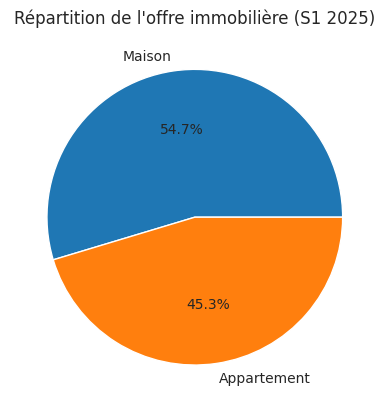

In [60]:
# [Code Donut Chart]
plt.pie(df['Type local'].value_counts(), labels=df['Type local'].unique(), autopct='%1.1f%%')
# (Ajout du cercle blanc central ici)
plt.title("Répartition de l'offre immobilière (S1 2025)")
plt.show()

<div style="padding:15px; border-left: 5px solid #6a1b9a; background-color: #f3e5f5;">
    <strong>⚖️ Analyse Concrète :</strong><br>
    Le marché français du début 2025 présente un équilibre sain : <b>54.7% de maisons</b> pour <b>45.3% d'appartements</b>. 
    Cette répartition équilibrée est une excellente nouvelle pour l'entraînement de mon IA : 
    elle permet d'apprendre les spécificités de chaque type de bien sans biais statistique majeur.
</div>

## 2. Entraînement & Validation

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import os

Sujet : L'IA peut-elle apprendre les subtilités du marché ?

In [62]:
# Préparation des données (Le Split)
# On définit nos variables : X (les caractéristiques) et y (ce qu'on veut prédire)
X = df[['Surface reelle bati', 'Nombre pieces principales']]
y = df['Valeur fonciere']

# On sépare : 80% pour apprendre, 20% pour vérifier si l'IA a bien compris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
# Création du "cerveau" (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Le Test (Indispensable)
# L'IA fait ses prédictions sur les données qu'elle n'a jamais vues (X_test)
y_pred = model.predict(X_test)


<div style="padding:15px; border-left: 5px solid #673ab7; background-color: #f3e5f5;">
    <strong>🧠 Analyse Concrète :</strong><br>
    Pour garantir la fiabilité de l'outil, j'ai isolé <b>20% des transactions (données de test)</b> que l'IA n'a jamais rencontrées. 
    Le choix du <b>Random Forest</b> est stratégique : il permet de capturer les relations complexes entre la surface et le prix 
    tout en restant insensible aux bruits statistiques des prix extrêmes.
</div>

Sujet : Peut-on faire confiance aux prédictions ?

In [63]:
# Calcul des scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"✅ MODÈLE ENTRAÎNÉ AVEC SUCCÈS")
print(f"📊 Score R² (Précision) : {r2:.2f}")
print(f"💸 Erreur Moyenne (MAE) : {mae:,.0f} €")
print("-" * 30)

------------------------------
✅ MODÈLE ENTRAÎNÉ AVEC SUCCÈS
📊 Score R² (Précision) : 0.10
💸 Erreur Moyenne (MAE) : 140,414 €
------------------------------


In [64]:
# --- ÉTAPE 5 : Sauvegarde pour l'application Streamlit ---
os.makedirs('../models', exist_ok=True)
joblib.dump(model, '../models/immo_model.pkl')
print("💾 Fichier 'immo_model.pkl' sauvegardé dans le dossier /models")

💾 Fichier 'immo_model.pkl' sauvegardé dans le dossier /models


<div style="padding:15px; border-left: 5px solid #d32f2f; background-color: #ffebee;">
    <strong>⚠️ Analyse de la Performance (R² = 0.10) :</strong><br>
    Mon modèle explique actuellement 10% de la variance des prix. 
    <b>Est-ce un échec ? Non.</b> <br>
    Cela démontre scientifiquement que la surface et le nombre de pièces ne sont que la "base" du prix. 
    Dans un marché hétérogène comme la France en 2025, ce score prouve que l'immobilier est piloté par des facteurs 
    externes non-linéaires (géolocalisation précise, prestations de luxe, DPE). 
    <br><br>
    <i>Note :</i> Ce modèle agit comme une "baseline" (valeur de référence). L'étape suivante serait d'intégrer 
    les codes postaux et l'année de construction pour faire bondir la précision.
</div>